<a href="https://colab.research.google.com/github/MStamirski/Spaceship-Titanic/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First look at data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "drive/MyDrive/Colab_Notebooks/SDA_upskill/Spaceship/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def read_data(filename):
  df = pd.read_csv(path+filename+".csv")
  return df

In [ ]:
df = read_data('train')
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


comment: there are nulls in data

In [ ]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

comment: high skewness in data related to payments, age distribution quite symmetrical

# Detailed column analysis

In [ ]:
def histogram(column):
  fig,ax=plt.subplots()
  ax.hist(column, bins=30)
  ax.set_ylabel('Number of observations')
  plt.show()

def centiles_graph(column):
  centiles=[np.quantile(column,q/100) for q in range(1,100)]
  fig, ax = plt.subplots()
  ax.bar(range(1,100),centiles)
  plt.show()

In [ ]:
def show_columns():
  for col in df.columns:
    print(f"COLUMN: {col}")
    print(df[col].value_counts())
    print("Nulls:", df[col].isna().sum())
    if df[col].dtype=='float64':
      print("Zeros:", len(df[df[col]==0]))
      print("Negatives:", len(df[df[col]<0]))
    print("==========================================")

In [ ]:
show_columns()

COLUMN: PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
Nulls: 0
COLUMN: HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
Nulls: 201
COLUMN: CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64
Nulls: 217
COLUMN: Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
Nulls: 199
COLUMN: Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
Nulls: 182
COLUMN: Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
Nulls: 179
Zeros: 178
Negatives: 0
COLUMN: VIP
False    8291


Observations:
* Passengers: 8693 unique identifiers
* HomePlanet: 3 values plus nulls
* Cryosleep: boolean values plus nulls
* Cabin: there are some for more than one person, there are nulls
* Destination: 3 values plus nulls
* Age: there are zeros and nulls
* VIP: boolean values plus nulls
* RoomService: there are zeros and nulls, no negatives
* FoodCourt: there are zeros and nulls, no negatives
* ShoppingMall: there are zeros and nulls, no negatives
* Spa: there are zeros and nulls, no negatives
* ShoppingMall: there are zeros and nulls, no negatives
* VRDeck: there are zeros and nulls, no negatives
* Names: there are nulls
* Transported: Dependent value, boolean, well balanced



# Data transformation

In [ ]:
df['HomePlanet'].fillna('Unknown', inplace=True)
df['HomePlanet'].value_counts()

Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: HomePlanet, dtype: int64

HomePlanet: nulls transformed to 'Unknown'

In [ ]:
df['CryoSleep']=df['CryoSleep'].apply(lambda x: 'True' if (x and not pd.isna(x)) else x)
df['CryoSleep']=df['CryoSleep'].apply(lambda x: 'False' if not x else x)
df['CryoSleep'].fillna('Unknown', inplace=True)
df['CryoSleep'].value_counts()

False      5439
True       3037
Unknown     217
Name: CryoSleep, dtype: int64

CryoSleep: from boolean converted to string to add third value for nulls: 'Unknown'

In [ ]:
df['Cabin'].fillna('0/000/0', inplace=True)
df['Cabin_deck']=df['Cabin'].apply(lambda x: x[:1])
df['Cabin_side']=df['Cabin'].apply(lambda x: x[-1:])
df['Cabin_num/100']=df['Cabin'].apply(lambda x: int(round(int(x[2:-2])/100,0)))
print(df['Cabin'].value_counts())
print(df['Cabin_deck'].value_counts())
print(df['Cabin_side'].value_counts())
print(df['Cabin_num/100'].value_counts())

0/000/0    199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
0     199
T       5
Name: Cabin_deck, dtype: int64
S    4288
P    4206
0     199
Name: Cabin_side, dtype: int64
1     1266
2     1127
0      860
3      852
4      463
5      456
6      390
10     370
9      339
7      321
8      317
11     315
13     312
14     305
12     295
15     247
17     162
16     142
18     124
19      30
Name: Cabin_num/100, dtype: int64


Cabin nr splited into 3 parts: deck, side and number of group, where group is one hundred consecutive cabin numbers

In [ ]:
df['Cabin_persons']=df['Cabin'].apply(lambda x: df['Cabin'].value_counts()[x])
df['Cabin_persons'].value_counts()

1      5427
2      1372
3       747
4       416
5       235
199     199
6       198
7        91
8         8
Name: Cabin_persons, dtype: int64

Additional column: how many people were in the cabin

In [ ]:
df['Destination'].fillna('Unknown', inplace=True)
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: Destination, dtype: int64

Destination: nulls transformed to 'Unknown'

In [ ]:
df['Age'].fillna(24, inplace=True)               # mode = 24
df['Age']=df['Age'].apply(lambda x: 24 if x==0 else x)
df['Age'].value_counts()

24.0    681
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 79, dtype: int64

Age: nulls and zeros replaced by 24, which is the mode of age distribution

In [ ]:
df['VIP']=df['VIP'].apply(lambda x: 'True' if (x and not pd.isna(x)) else x)
df['VIP']=df['VIP'].apply(lambda x: 'False' if not x else x)
df['VIP'].fillna('Unknown', inplace=True)
df['VIP'].value_counts()

False      8291
Unknown     203
True        199
Name: VIP, dtype: int64

VIP: from boolean converted to string to add third value for nulls: 'Unknown'

In [ ]:
df['RoomService'].fillna(0, inplace=True)
df['RoomService'].value_counts()

0.0       5758
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

RoomService: nulls transformed to 'Unknown', zeros left unchanged

In [ ]:
df['FoodCourt'].fillna(0, inplace=True)
df['FoodCourt'].value_counts()

0.0       5639
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

FoodCourt: nulls transformed to 'Unknown', zeros left unchanged

In [ ]:
df['ShoppingMall'].fillna(0, inplace=True)
df['ShoppingMall'].value_counts()

0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

ShoppingMall: nulls transformed to 'Unknown', zeros left unchanged

In [ ]:
df['Spa'].fillna(0, inplace=True)
df['Spa'].value_counts()

0.0       5507
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

Spa: nulls transformed to 'Unknown', zeros left unchanged

In [ ]:
df['VRDeck'].fillna(0, inplace=True)
df['VRDeck'].value_counts()

0.0       5683
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64

VRDeck: nulls transformed to 'Unknown', zeros left unchanged

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   object 
 3   Cabin          8693 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   object 
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Cabin_deck     8693 non-null   object 
 15  Cabin_side     8693 non-null   object 
 16  Cabin_num/100  8693 non-null   int64  
 17  Cabin_persons  8693 non-null   int64  
dtypes: bool(

All columns have 8693 values (no nulls any more)

In [ ]:
show_columns()

COLUMN: PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
Nulls: 0
COLUMN: HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: HomePlanet, dtype: int64
Nulls: 0
COLUMN: CryoSleep
False      5439
True       3037
Unknown     217
Name: CryoSleep, dtype: int64
Nulls: 0
COLUMN: Cabin
0/000/0    199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64
Nulls: 0
COLUMN: Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: Destination, dtype: int64
Nulls: 0
COLUMN: Age
24.0    681
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 79, dtype: int

New values in some columns, several new columns. A "cabin" for 199 persons means a space for those people who hadn't their cabin number.

# Data visualization

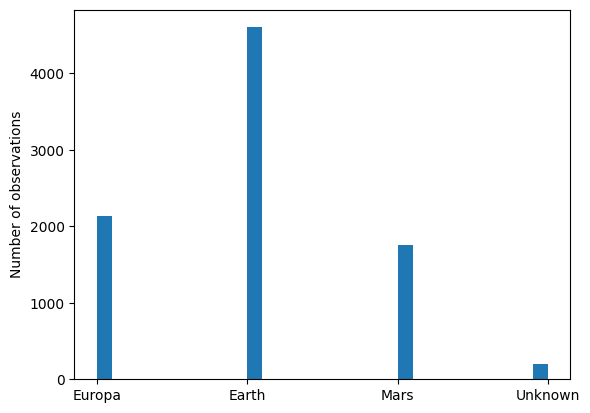

In [ ]:
histogram(df['HomePlanet'])

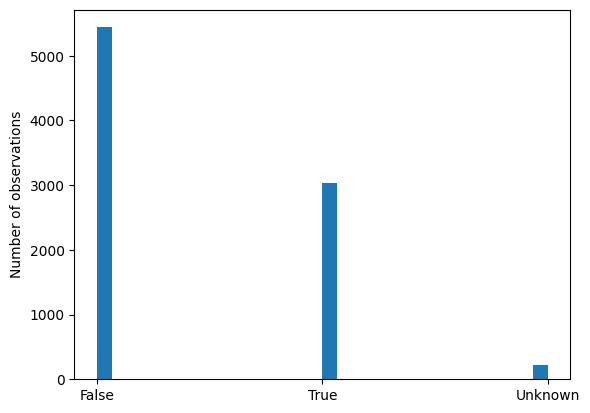

In [ ]:
histogram(df['CryoSleep'])

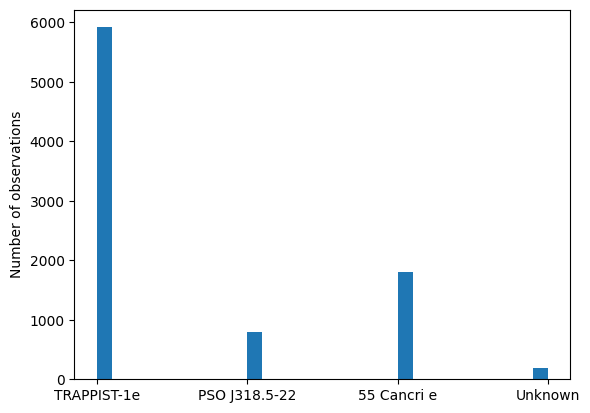

In [ ]:
histogram(df['Destination'])

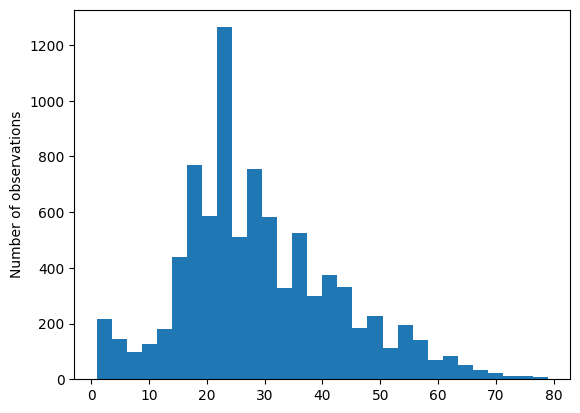

In [ ]:
histogram(df['Age'])

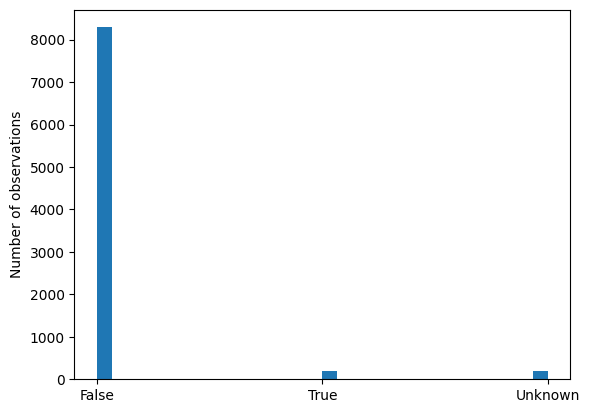

In [ ]:
histogram(df['VIP'])

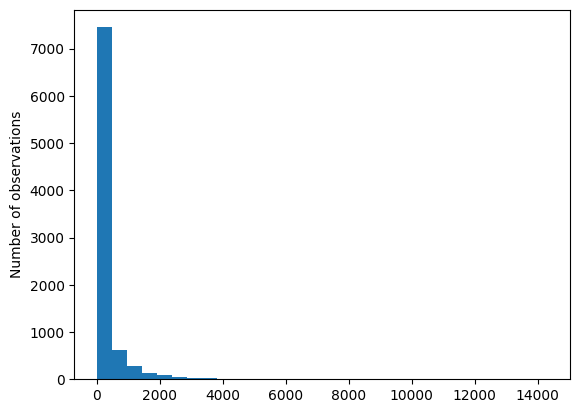

In [ ]:
histogram(df['RoomService'])

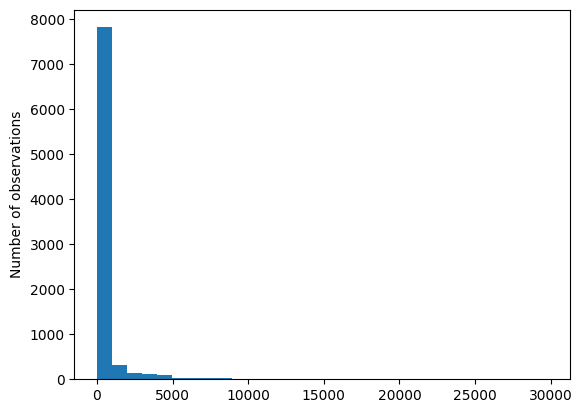

In [ ]:
histogram(df['FoodCourt'])

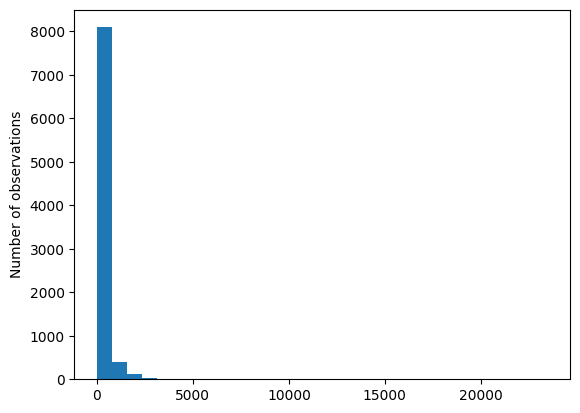

In [ ]:
histogram(df['ShoppingMall'])

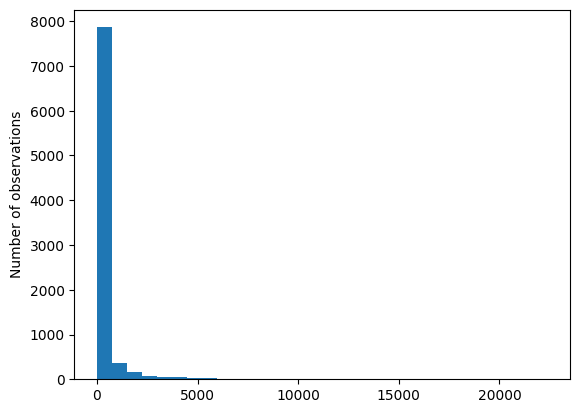

In [ ]:
histogram(df['Spa'])

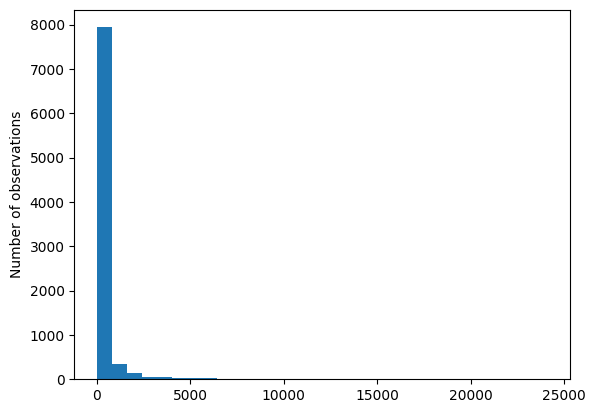

In [ ]:
histogram(df['VRDeck'])

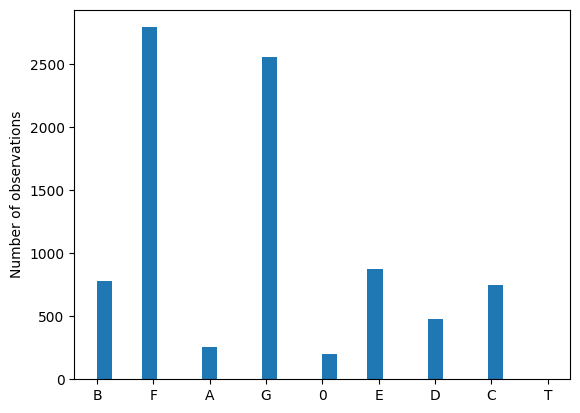

In [ ]:
histogram(df['Cabin_deck'])

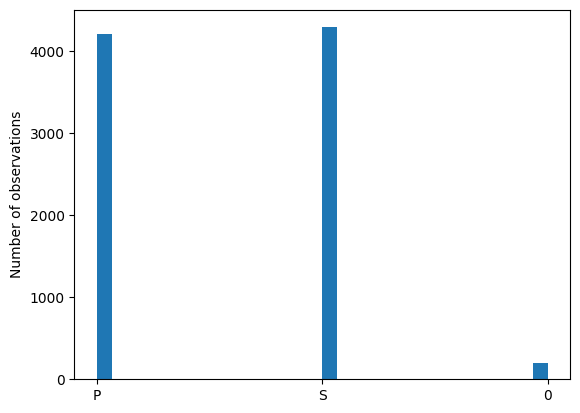

In [ ]:
histogram(df['Cabin_side'])

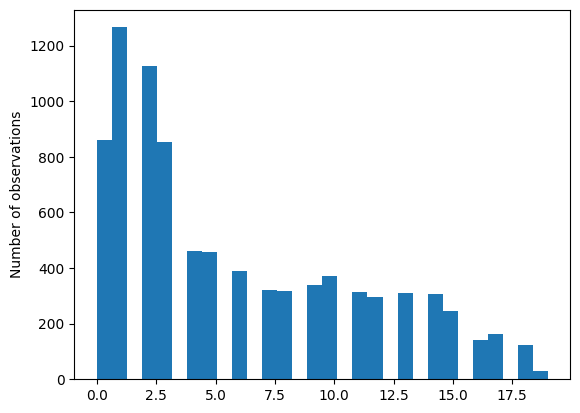

In [ ]:
histogram(df['Cabin_num/100'])

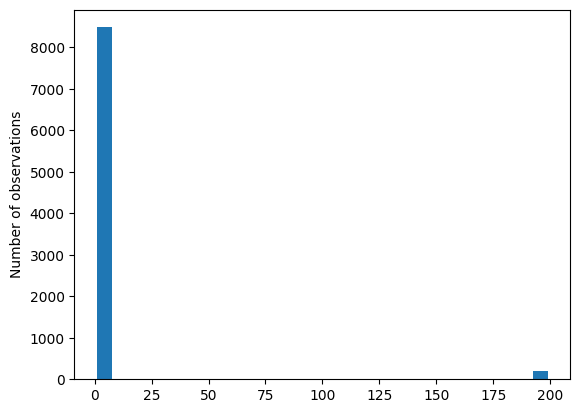

In [ ]:
histogram(df['Cabin_persons'])

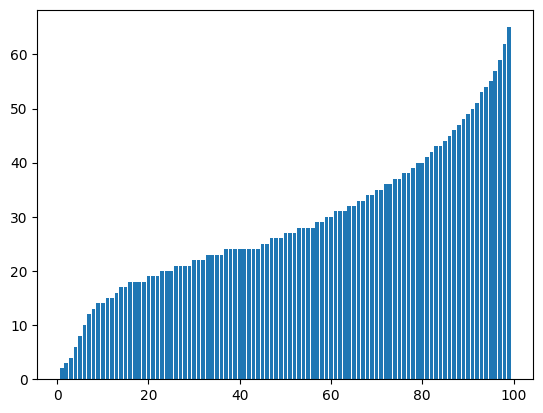

In [ ]:
centiles_graph(df['Age'])

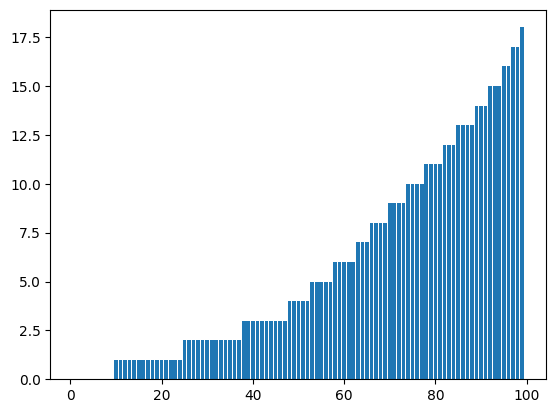

In [ ]:
centiles_graph(df['Cabin_num/100'])

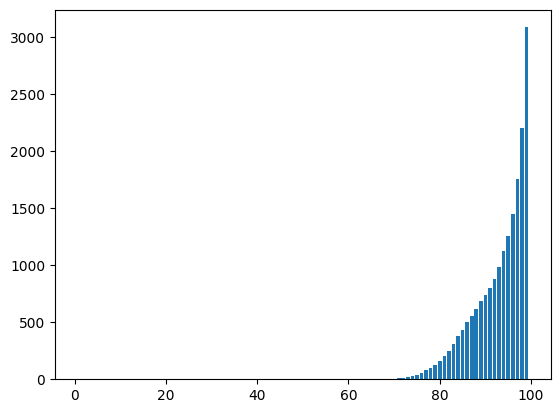

In [ ]:
centiles_graph(df['RoomService'])

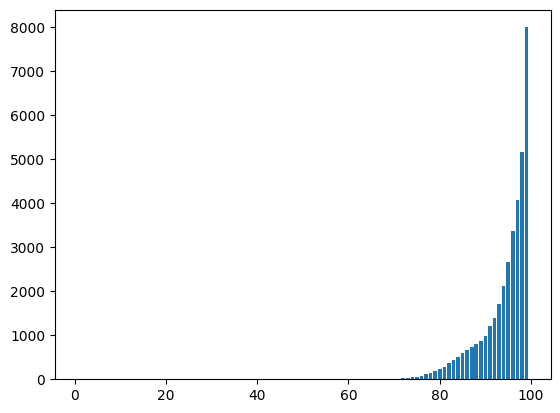

In [ ]:
centiles_graph(df['FoodCourt'])

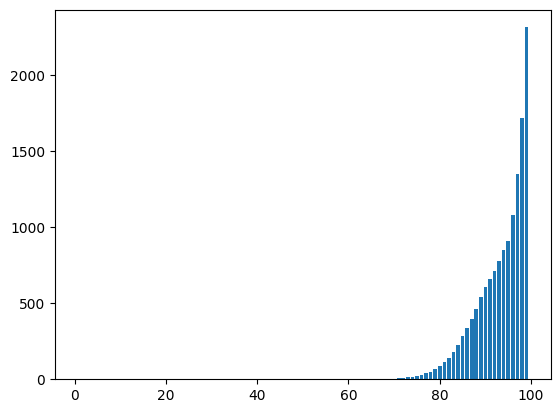

In [ ]:
centiles_graph(df['ShoppingMall'])

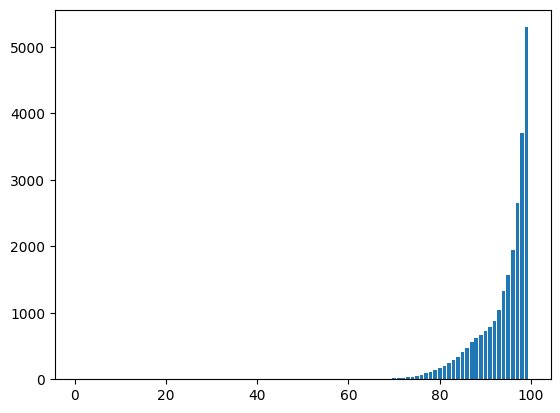

In [ ]:
centiles_graph(df['Spa'])

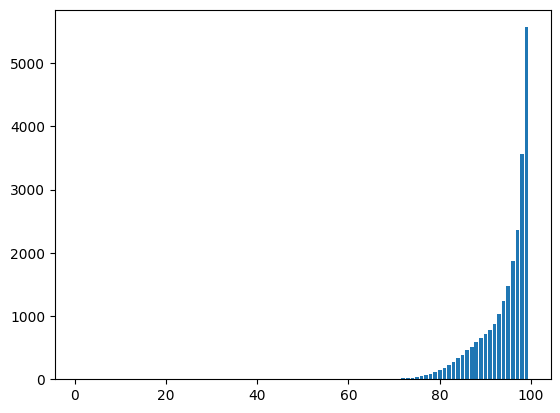

In [ ]:
centiles_graph(df['VRDeck'])

In [ ]:
import seaborn as sns

def num_corr_heatmap():
  correlation = df.corr()
  plt.figure(figsize=(12,7))
  sns.heatmap(correlation, annot=True, fmt=".1f")

In [ ]:
from scipy.stats import chi2_contingency

def cat_corr_heatmap():

  cols = df.columns.values
  pairs = [(col_x, col_y) for col_x in cols for col_y in cols] 
  chi2, p_values =[], []

  for pair in pairs:
    if pair[0] != pair[1]:
        chitest = chi2_contingency(pd.crosstab(df[pair[0]], df[pair[1]]))   
        chi2.append(chitest[0])
        p_values.append(round(chitest[1],2))
    else:
        chi2.append(0)
        p_values.append(0)

  chi2 = np.array(chi2).reshape((len(cols),len(cols)))
  p_values = np.array(p_values).reshape((len(cols),len(cols)))

  fig, ax = plt.subplots(figsize=(12,7))
  heatmap = ax.imshow(p_values, interpolation='nearest', aspect='auto') # fit to figsize

  ax.set_xticks(np.arange(len(cols)), labels=cols)
  plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
  ax.set_yticks(np.arange(len(cols)), labels=cols)

  cbar = ax.figure.colorbar(heatmap, ax=ax)
  cbar.ax.set_ylabel("p_value", rotation=-90, va="bottom")

  for i in range(len(cols)):
    for j in range(len(cols)):
      text = ax.text(j, i, round(p_values[i,j],2), ha="center", va="center", color="w")

  plt.show()

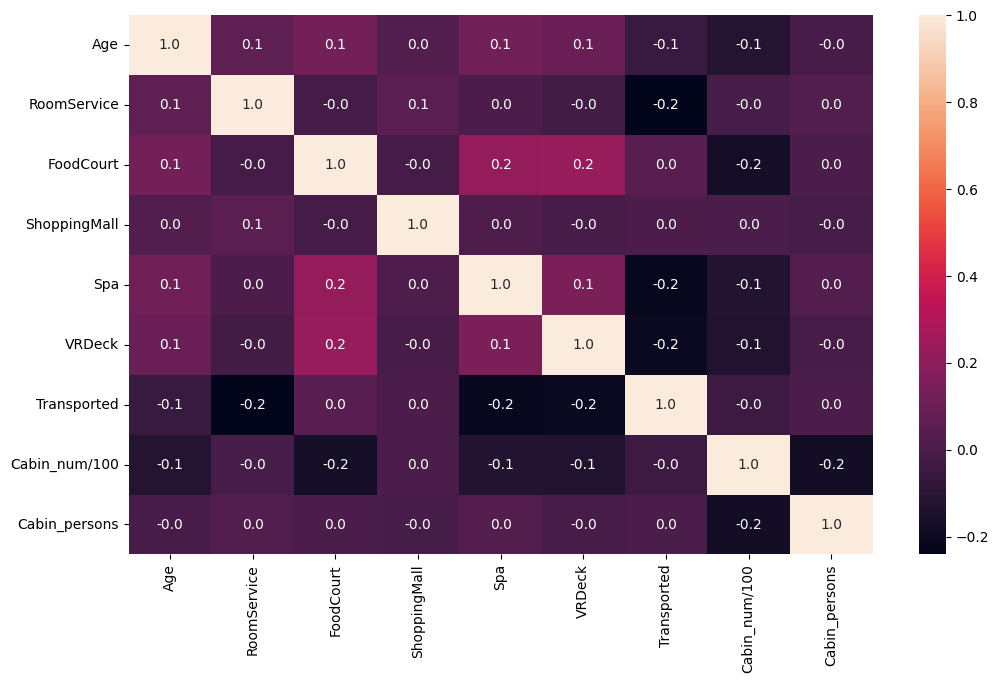

In [ ]:
num_corr_heatmap()

comment: low correlation between numerical variables (max for FoodCourt with Spa an VRDeck: 20%)

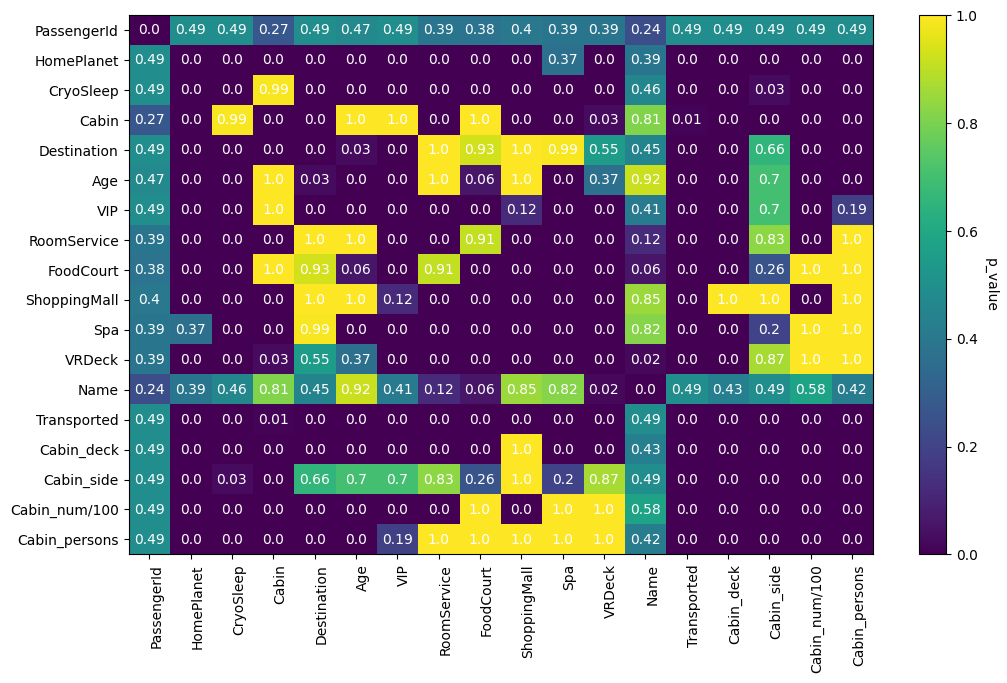

In [ ]:
cat_corr_heatmap()

Heatmap above shows p_value, which is a probalility of H0 hypothesis, that two variables are not correlated. Most of values are lower than 0.05, which means, that in their cases H0 should be rejected, i.e. variables are correlated. It is worth notting, that dependent variable "Transported" is correlated with almost all independent variables, except for "Passenger ID" and "Name".

In [ ]:
def x_by_y(xcols):
  for col in xcols:
    print(f"Column: {col}")

    if df.dtypes[col]=='float64':
      meanT = round(df[df['Transported']==True][col].mean(),2)
      meanF = round(df[df['Transported']==False][col].mean(),2)
      medianT = round(df[df['Transported']==True][col].median(),2)
      medianF = round(df[df['Transported']==False][col].median(),2)
      maxT = round(df[df['Transported']==True][col].max(),2)
      maxF = round(df[df['Transported']==False][col].max(),2)
      minT = round(df[df['Transported']==True][col].min(),2)
      minF = round(df[df['Transported']==False][col].min(),2)
      print("Transported   False     True")
      print(col)
      print(f"mean          {meanF}    {meanT}")
      print(f"median        {medianF}       {medianT}")
      print(f"max            {maxF}       {maxT}")
      print(f"min            {minF}       {minT}")
    else:
      print(pd.crosstab(df[col], df['Transported']))
    
    print("======================================")


In [ ]:
columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
x_by_y(columns)

Column: Age
Transported   False     True
Age
mean          29.99    28.46
median        27.0       26.0
max            79.0       78.0
min            1.0       1.0
Column: RoomService
Transported   False     True
RoomService
mean          380.43    61.9
median        1.0       0.0
max            14327.0       3992.0
min            0.0       0.0
Column: FoodCourt
Transported   False     True
FoodCourt
mean          375.17    520.65
median        0.0       0.0
max            16856.0       29813.0
min            0.0       0.0
Column: ShoppingMall
Transported   False     True
ShoppingMall
mean          163.92    175.15
median        0.0       0.0
max            10705.0       23492.0
min            0.0       0.0
Column: Spa
Transported   False     True
Spa
mean          552.35    60.39
median        2.0       0.0
max            22408.0       4103.0
min            0.0       0.0
Column: VRDeck
Transported   False     True
VRDeck
mean          532.29    67.6
median        1.0       0.0
max    

comment: there are visible differences in payment data assigned to values of dependent variable ('Transported')

# Discretization of numerical data

numerical data will be divided into deciles and transformed into number of decile

In [ ]:
def calculate_deciles(col):
  return [np.quantile(col,q/100) for q in range(10, 101, 10)]

def get_decile(x, deciles):
  for dec_nr, dec_val in enumerate(deciles):
    decile = dec_nr
    if x <= dec_val:
      break
  return decile + 1

In [ ]:
deciles = calculate_deciles(df['Age'])
df['Age_deciles'] = df['Age'].apply(lambda x: get_decile(x, deciles))
df['Age_deciles'].value_counts()

2     1073
4      973
9      920
1      907
7      898
3      879
10     811
8      782
5      770
6      680
Name: Age_deciles, dtype: int64

In [ ]:
deciles = calculate_deciles(df['RoomService'])
df['RService_deciles'] = df['RoomService'].apply(lambda x: get_decile(x, deciles))
df['RService_deciles'].value_counts()

1     5758
9      869
10     869
8      865
7      332
Name: RService_deciles, dtype: int64

In [ ]:
deciles = calculate_deciles(df['FoodCourt'])
df['FCourt_deciles'] = df['FoodCourt'].apply(lambda x: get_decile(x, deciles))
df['FCourt_deciles'].value_counts()

1     5639
9      870
10     869
8      852
7      463
Name: FCourt_deciles, dtype: int64

In [ ]:
deciles = calculate_deciles(df['ShoppingMall'])
df['ShMall_deciles'] = df['ShoppingMall'].apply(lambda x: get_decile(x, deciles))
df['ShMall_deciles'].value_counts()

1     5795
8      869
10     869
9      868
7      292
Name: ShMall_deciles, dtype: int64

In [ ]:
deciles = calculate_deciles(df['Spa'])
df['Spa_deciles'] = df['Spa'].apply(lambda x: get_decile(x, deciles))
df['Spa_deciles'].value_counts()

1     5507
9      869
10     869
8      851
7      597
Name: Spa_deciles, dtype: int64

In [ ]:
deciles = calculate_deciles(df['VRDeck'])
df['VRD_deciles'] = df['VRDeck'].apply(lambda x: get_decile(x, deciles))
df['VRD_deciles'].value_counts()

1     5683
10     870
9      868
8      848
7      424
Name: VRD_deciles, dtype: int64

In [ ]:
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side', 'Cabin_num/100', 'Cabin_persons', 'Age', 'Age_deciles', 'RoomService', 'RService_deciles', 'FoodCourt', 'FCourt_deciles', 'ShoppingMall', 'ShMall_deciles', 'Spa', 'Spa_deciles', 'VRDeck', 'VRD_deciles']
x_by_y(columns)

Column: HomePlanet
Transported  False  True
HomePlanet              
Earth         2651  1951
Europa         727  1404
Mars           839   920
Unknown         98   103
Column: CryoSleep
Transported  False  True
CryoSleep               
False         3650  1789
True           554  2483
Unknown        111   106
Column: Destination
Transported    False  True
Destination               
55 Cancri e      702  1098
PSO J318.5-22    395   401
TRAPPIST-1e     3128  2787
Unknown           90    92
Column: VIP
Transported  False  True
VIP                     
False         4093  4198
True           123    76
Unknown         99   104
Column: Cabin_deck
Transported  False  True
Cabin_deck              
0               99   100
A              129   127
B              207   572
C              239   508
D              271   207
E              563   313
F             1565  1229
G             1238  1321
T                4     1
Column: Cabin_side
Transported  False  True
Cabin_side              
0     

observations:
* HomePlanet of Transported people was rather Europe than Earth
* they were mostly put in the CryoSleep
* they headed to Cancri rather than to Trapisti
* they leaved rather in B or C deck than in E or F
* they leaved rather on S side than P
* they shared their cabin with other people
* they paid less than not transformed people
* Age wasn't visibly correlated with people's transportation

In [ ]:
!pip install ydata-profiling

# Ydata profiling (former pandas profiler)

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]